Welcome to Week 1 of our seminar on Applied Quantitative Methods in Finance. This week, we will embark on our journey through the fascinating world of financial analysis using Python. Our focus will be on foundational techniques that are crucial for any quantitative researcher.

We'll spend a lot of time learning how to find and load data into Python, which is the first step in any data analysis process. You'll become familiar with WRDS, and learn how to import them using the pandas library.

Next, we'll delve into descriptive statistics to summarize and understand the underlying characteristics of financial datasets. This includes measures like mean, median, standard deviation, and more, providing insights into data distribution and central tendencies.

We will also explore the concept of correlation, which measures the relationship between two variables. Understanding correlation is key to such tasks as identifying patterns which we will review using the example of executive compensation.

Finally, we'll introduce initial graphing techniques. Visualizing data is not just about making appealing graphics, but about uncovering the story that data tells, which is essential for making informed financial decisions.

Throughout this week, we will also discuss the quantitative research process in finance, setting the stage for more complex analyses as the course progresses.

I look forward to guiding you through these exciting topics and helping you build a solid foundation in applied quantitative methods. Let’s get started!

# Package Imports

In this section, we load the necessary libraries for our analysis and we set some basic parameters.

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None) # display all columns

# Executive Compensation and Executive/Firm Characteristics

In this research project, we will explore the use of correlations to identify relationships between firm and executive characteristics and director compensation. Understanding these relationships is crucial for financial analysts and researchers as it sheds light on how different factors influence executive pay and compensation structures.

We propose several hypotheses to investigate potential relationships between firm characteristics, executive attributes, and compensation:

- Hypothesis 1: Larger firms (measured by market capitalization) are associated with higher director compensation. This is based on the assumption that larger firms have more resources and potentially more complex operations, necessitating higher pay for directors.
- Hypothesis 2: Higher revenue is positively correlated with higher director compensation, as firms with greater revenue can afford to pay more to attract and retain top executive talent.
- Hypothesis 3: There is a positive relationship between the total number of employees and director compensation, reflecting the increased responsibility and oversight required in larger organizations.

## Loading Data from WRDS (BoardEx Example)

The BoardEx dataset is a comprehensive collection of data on board members and senior executives from publicly traded companies as well as notable private companies across the globe. This dataset includes detailed profiles on individuals, covering their professional histories, network connections, committee memberships, and other relevant attributes. Additionally, BoardEx contains information on company governance structures, compensation data, and various organizational metrics.

For analysts and researchers in finance, BoardEx provides a valuable resource for studying leadership characteristics, board compositions, and their impacts on company performance and corporate governance. The dataset's rich, interconnected data points allow for sophisticated quantitative analyses, such as network analysis, predictive modeling, and trend identification within corporate leadership and governance practices.

Last week you had a brief first introduction to downloading data from WRDS.  We are now going to extend this by loading data from a specific database.  Please double check that you have a file called .env in your folder that contains your unique username and password combination. 


First, we establish a connection to the WRDS database.

In [2]:
# import necessary packages
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

# load your credentials and establish connection to WRDS
load_dotenv()
connection_string = (
  "postgresql+psycopg2://"
 f"{os.getenv('WRDS_USER')}:{os.getenv('WRDS_PASSWORD')}"
  "@wrds-pgdata.wharton.upenn.edu:9737/wrds"
)
wrds_engine = create_engine(connection_string, pool_pre_ping=True)

To help you create the right query, you can go to the BoardEx website at [] and use the WRDS portal to get a quick view of the dataset.  You can download data from there as a CSV file and then import it into Python, but to aid reuse of your code, I recommend you create the query in SQL and apply it using the WRDS API.  This is demonstrated below.   Go ahead and add the fields you find the most interesting for your own analysis project. 

### Exporing BoardEx

Let's explore the BoardEx dataset on the database level.

In [9]:
import wrds  # WRDS proprietary access package

In [10]:
# Connect to WRDS
db = wrds.Connection()

Enter your WRDS username [erik]: emekelburg
Enter your password: ········


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  n


You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


Identify databases of interest, in our case, we want to look at BoardEx data, DB name is simply boardex.

In [12]:
db.list_libraries()[5:20]

['audit_corp_legal',
 'auditsmp',
 'auditsmp_all',
 'bank',
 'bank_all',
 'block',
 'block_all',
 'boardex',
 'boardex_na',
 'boardex_trial',
 'boardsmp',
 'bvd',
 'bvd_ama_large',
 'bvd_ama_medium',
 'bvd_ama_small']

In [48]:
# List all datasets/tables in a specific library
db.list_tables(library='boardex')[45:90]

['eur_wrds_org_composition',
 'eur_wrds_org_summary',
 'na_board_characteristics',
 'na_board_dir_announcements',
 'na_board_dir_committees',
 'na_board_education_assoc',
 'na_board_listed_assoc',
 'na_board_nfp_assoc',
 'na_board_other_assoc',
 'na_board_unlisted_assoc',
 'na_company_profile_advisors',
 'na_company_profile_details',
 'na_company_profile_market_cap',
 'na_company_profile_sr_mgrs',
 'na_company_profile_stocks',
 'na_dir_characteristics',
 'na_dir_education_assoc',
 'na_dir_listed_assoc',
 'na_dir_nfp_assoc',
 'na_dir_other_assoc',
 'na_dir_profile_achievements',
 'na_dir_profile_details',
 'na_dir_profile_education',
 'na_dir_profile_emp',
 'na_dir_profile_other_activ',
 'na_dir_standard_remun',
 'na_dir_unlisted_assoc',
 'na_ltip_compensation',
 'na_ltip_wealth',
 'na_options_compensation',
 'na_options_wealth',
 'na_wrds_board_char_overall',
 'na_wrds_company_dir_names',
 'na_wrds_company_director_names',
 'na_wrds_company_names',
 'na_wrds_company_networks',
 'na_wrd

Note that DU only subscribes to the North America BoardEx data, therefore we use tables with the prefix na_.
Let's say we'd like to read data on director characteristics from table na_dir_characteristics.

Now we explore the data a bit.  Let's use the example of Clorox CEO Linda Rendle. You'll find documentation on the tables and fields on the WRDS website at:  https://wrds-www.wharton.upenn.edu/pages/get-data/boardex/boardex-north-america/ 

It is useful to open up those definitions in another browser window, so you go back an forth as you explore. 

In [34]:
# read first five rows from the table to understand the data format.
pd.read_sql_query(
  sql="SELECT * from boardex.na_dir_profile_education  \
      WHERE directorname = 'Linda Rendle' \
      LIMIT 5",
  con=wrds_engine,
)

,rowtype,directorname,companyname,qualification,fulltextdescription,directorid,companyid,awarddate
0,Education,Linda Rendle,Harvard University,BA,None,1768838.0,63830.0,2000-01-01


In [35]:
pd.read_sql_query(
  sql="SELECT * from boardex.na_dir_profile_achievements   \
      WHERE directorname = 'Linda Rendle' \
      LIMIT 5",
  con=wrds_engine,
)

,rowtype,directorname,companyname,achievement,directorid,companyid,achievementdate
0,Achievements,Linda Rendle,Wealth-X Pte Ltd,Listed as a Very-High Net Worth Individual,1768838.0,2059053.0,2021-01-01
1,Achievements,Linda Rendle,Wealth-X Pte Ltd,Listed as an Ultra-High Net Worth Individual,1768838.0,2059053.0,2022-01-01


In [36]:
pd.read_sql_query(
  sql="SELECT * from boardex. 	na_dir_profile_details    \
      WHERE directorname = 'Linda Rendle' \
      LIMIT 5",
  con=wrds_engine,
)

,directorname,title,forename1,forename2,forename3,forename4,usualname,surname,suffixtitle,dob,dod,age,gender,nationality,recreations,directorvisible,directorid,networksize
0,Linda Rendle,Ms,Linda,J,None,None,None,Rendle,None,1978,n.a.,46,F,American,None,Yes,1768838.0,3511.0


In [37]:
pd.read_sql_query(
  sql="SELECT * from boardex.na_wrds_dir_profile_emp    \
      WHERE directorname = 'Linda Rendle'\
      AND dateendrole  IS NULL  \
      AND datestartrole IS NOT NULL",
  con=wrds_engine,
)

,rowtype,directorname,companyname,brdposition,rolename,fulltextdescription,ned,directorid,companyid,datestartrole,dateendrole,hocountryname,sector,orgtype,isin
0,Listed Organisations,Linda Rendle,CLOROX COMPANY (THE),Yes,Chair/CEO,Principal Executive Officer also Member of the...,No,1768838.0,7089.0,2024-01-01,None,United States,Chemicals,Quoted,US1890541097
1,Listed Organisations,Linda Rendle,CLOROX COMPANY (THE),Yes,Chair/CEO,Principal Executive Officer also Member of the...,No,1768838.0,7089.0,2024-01-01,None,United States,Chemicals,Quoted,US1890541097
2,Listed Organisations,Linda Rendle,VISA INC,Yes,Independent Director,None,Yes,1768838.0,937594.0,2020-11-23,None,United States,Speciality & Other Finance,Quoted,US92826C8394


In [38]:
pd.read_sql_query(
  sql="SELECT * from boardex.na_dir_profile_other_activ     \
      WHERE directorname = 'Linda Rendle' \
      LIMIT 5",
  con=wrds_engine,
)

,rowtype,directorname,companyname,rolename,directorid,companyid,startdate,enddate
0,Other Activities,Linda Rendle,Bay Area Council,Director - SD,1768838.0,78328.0,2024-01-01,None
1,Other Activities,Linda Rendle,Business Roundtable (BRT),Member,1768838.0,103947.0,None,None
2,Other Activities,Linda Rendle,American Cleaning Institute (ACI) (Formerly kn...,Director - SD,1768838.0,537449.0,2017-06-09,None


In [5]:
pd.read_sql_query(
  sql="SELECT * from boardex.na_dir_standard_remun     \
       WHERE directorid = '1768838' \
      LIMIT 5",
  con=wrds_engine,
)


,rowtype,boardname,ned,directorname,rolename,currency,rolestatus,remchgelast,recordid,boardid,directorid,salary,bonus,other,penempcon,totalcompensation,valtoteqheld,valltipheld,intvaloptheld,estvaloptheld,toteqlinkedwlth,valeqaward,ltipvalue,intrvaloptaward,estvaloptaward,toteqatrisk,totremperiod,bonusratio,eqlinkremratio,wealthdelta,totaldirectcomp,perftotal,annualreportdate
0,Board Member,CLOROX COMPANY (THE),No,Linda Rendle,CEO,USD,Linda Rendle has changed role on 14 Sep 2020,None,0.0,7089.0,1768838.0,1006.0,None,35.0,30.0,1006.0,1909.0,6534.0,5494.0,14867.0,23310.0,None,5216.0,NaN,2396.0,7612.0,8618.0,None,0.88,351.0,1071.0,0.61,2021-06-01
1,Board Member,CLOROX COMPANY (THE),No,Linda Rendle,Chair/CEO,USD,Linda Rendle has changed role on 01 Jan 2024,None,0.0,7089.0,1768838.0,NaN,None,NaN,NaN,0.0,4563.0,14631.0,1685.0,14205.0,33399.0,None,NaN,NaN,NaN,NaN,NaN,None,NaN,504.0,0.0,NaN,None
2,Disclosed Earner,CLOROX COMPANY (THE),No,Linda Rendle,CEO,USD,Linda Rendle has changed role on 14 Sep 2020,None,5.0,7089.0,1768838.0,1006.0,None,35.0,30.0,1006.0,1909.0,6534.0,5494.0,14867.0,23310.0,None,5216.0,NaN,2396.0,7612.0,8618.0,None,0.88,351.0,1071.0,0.61,2021-06-01
3,Disclosed Earner,CLOROX COMPANY (THE),No,Linda Rendle,Chair/CEO,USD,Linda Rendle has changed role on 01 Jan 2024,None,5.0,7089.0,1768838.0,NaN,None,NaN,NaN,0.0,4563.0,14631.0,1685.0,14205.0,33399.0,None,NaN,NaN,NaN,NaN,NaN,None,NaN,504.0,0.0,NaN,None
4,Disclosed Earner,CLOROX COMPANY (THE),No,Linda Rendle,Executive VP - Ops/Strategy,USD,Linda Rendle has changed role on 07 Jan 2019,None,5.0,7089.0,1768838.0,524.0,None,35.0,26.0,524.0,1059.0,2182.0,2167.0,6757.0,9997.0,None,975.0,24.0,1934.0,2910.0,3434.0,None,0.85,152.0,585.0,0.28,2019-06-01


In [6]:
pd.read_sql_query(
  sql="SELECT * from boardex.na_wrds_dir_profile_all     \
       WHERE directorid = '1768838' \
      LIMIT 5",
  con=wrds_engine,
)

,directorname,title,forename1,forename2,forename3,forename4,usualname,surname,suffixtitle,dob,dod,age,gender,nationality,recreations,directorvisible,directorid,networksize,achievement,qualification,rowtype,companyname,brdposition,rolename,fulltextdescription,ned,companyid,datestartrole,dateendrole,startdate,enddate,achievementdate,awarddate
0,Linda Rendle,Ms,Linda,J,None,None,None,Rendle,None,1978,n.a.,46,F,American,None,Yes,1768838.0,3511.0,None,None,Listed Organisations,CLOROX COMPANY (THE),Yes,CEO,Principal Executive Officer Also Member of the...,No,7089.0,2020-09-14,2024-01-01,None,None,None,None
1,Linda Rendle,Ms,Linda,J,None,None,None,Rendle,None,1978,n.a.,46,F,American,None,Yes,1768838.0,3511.0,None,None,Listed Organisations,CLOROX COMPANY (THE),No,Division Director - Sales,Customer Supply Chain,No,7089.0,2010-01-01,2011-08-01,None,None,None,None
2,Linda Rendle,Ms,Linda,J,None,None,None,Rendle,None,1978,n.a.,46,F,American,None,Yes,1768838.0,3511.0,None,None,Listed Organisations,PROCTER & GAMBLE CO,No,Various Positions,None,No,25150.0,2000-08-01,2003-01-01,None,None,None,None
3,Linda Rendle,Ms,Linda,J,None,None,None,Rendle,None,1978,n.a.,46,F,American,None,Yes,1768838.0,3511.0,None,None,Listed Organisations,CLOROX COMPANY (THE),No,Division VP - Sales,Cleaning Division,No,7089.0,2012-04-01,2014-10-01,None,None,None,None
4,Linda Rendle,Ms,Linda,J,None,None,None,Rendle,None,1978,n.a.,46,F,American,None,Yes,1768838.0,3511.0,None,None,Listed Organisations,CLOROX COMPANY (THE),No,Senior VP/Division General Manager,Cleaning Division Also Responsible for Profess...,No,7089.0,2016-08-01,2017-07-01,None,None,None,None


### Constructing the Data Set

Now that we have explored what data is available, it is time to construct our data set.   Above we used an executive's name to access the data, but for our research project we want to collect a broader data set without having to select each executive individually.  

We want to be able to select all executives for a list of firms.  

To do this, we need to link several tables together.   A quick search on WRDS reveals that the platfrom offers a cross reference table called bdxcrspcomplink in library wrdsapps to facilitate this (https://wrds-www.wharton.upenn.edu/pages/get-data/linking-suite-wrds/boardex-crsp-compustat-link/). 

Further, we can use table crsp.stocknames to get the cross reference from the ticker to the permco identifier. 

In [6]:
# Define list of firms we are interested in by ticker
tickers = [
    "AAPL", "AXP", "BA", "CAT", "CSCO", "CVX", "DD", "DIS", "GE", "GS",
    "HD", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT",
    "NKE", "PFE", "PG", "TRV", "UNH", "UTX", "V", "VZ", "WMT", "XOM"
]
formatted_tickers = "'" + "', '".join(tickers) + "'"

In [90]:
# we can also query the WRDS DB for all tickers in the SP500 that don't have an old end date
tickers = pd.read_sql_query(
              sql=f"SELECT DISTINCT stn.ticker \
                    FROM crsp.dsp500list as dsp500list    \
                    LEFT JOIN crsp.stocknames as stn \
                    ON dsp500list.permno = stn.permno \
                    WHERE dsp500list.ending > '{01/01/2023}'",
              con=wrds_engine,
            )
formatted_tickers = "'" + "', '".join(list(tickers.ticker.dropna())) + "'"

#### Find Cross References

In [7]:
pd.read_sql_query(
  sql="SELECT * from wrdsapps.bdxcrspcomplink     \
       LIMIT 5",
  con=wrds_engine,
)

,permco,gvkey,companyid,score,preferred,duplicate
0,5,016671,2917.0,1.0,1.0,0.0
1,7,001690,2355.0,1.0,1.0,0.0
2,23,011153,141957.0,9.0,1.0,0.0
3,24,001402,1764.0,10.0,1.0,0.0
4,25,001619,2116.0,2.0,1.0,0.0


In [8]:
pd.read_sql_query(
  sql="SELECT * from crsp.stocknames    \
       LIMIT 5",
  con=wrds_engine,
)

,permno,namedt,nameenddt,shrcd,exchcd,siccd,ncusip,ticker,comnam,shrcls,permco,hexcd,cusip,st_date,end_date,namedum
0,10000,1986-01-07,1987-06-11,10,3,3990,68391610,OMFGA,OPTIMUM MANUFACTURING INC,A,7952,3,68391610,1986-01-07,1987-06-11,2.0
1,10001,1986-01-09,1993-11-21,11,3,4920,39040610,GFGC,GREAT FALLS GAS CO,None,7953,2,36720410,1986-01-09,2017-08-03,2.0
2,10001,1993-11-22,2008-02-04,11,3,4920,29274A10,EWST,ENERGY WEST INC,None,7953,2,36720410,1986-01-09,2017-08-03,2.0
3,10001,2008-02-05,2009-08-03,11,3,4920,29274A20,EWST,ENERGY WEST INC,None,7953,2,36720410,1986-01-09,2017-08-03,2.0
4,10001,2009-08-04,2009-12-17,11,3,4920,29269V10,EGAS,ENERGY INC,None,7953,2,36720410,1986-01-09,2017-08-03,2.0


In [9]:
# develop cross reference for a single ticker
pd.read_sql_query(
  sql=f"SELECT * FROM crsp.stocknames as stn   \
        WHERE stn.ticker IN ({formatted_tickers}) \
        AND ticker = 'DD' \
        AND stn.nameenddt = ( \
          SELECT MAX(stn2.nameenddt) \
          FROM crsp.stocknames AS stn2 \
          WHERE stn2.ticker = stn.ticker \
      )",
  con=wrds_engine,
)

,permno,namedt,nameenddt,shrcd,exchcd,siccd,ncusip,ticker,comnam,shrcls,permco,hexcd,cusip,st_date,end_date,namedum
0,16851,2020-03-26,2023-12-29,11,1,2821,26614N10,DD,DUPONT DE NEMOURS INC,None,56027,1,26614N10,2017-09-01,2023-12-29,2.0


#### Download Cross Reference Table

In [95]:
# assemble the SQL code to generate the cross reference
boardex_ticker_xref = pd.read_sql_query(
  sql=f"SELECT DISTINCT stn.ticker, xlink.companyid \
        FROM crsp.stocknames as stn   \
        LEFT JOIN wrdsapps.bdxcrspcomplink as xlink \
        ON stn.permco = xlink.permco \
        WHERE stn.ticker IN ({formatted_tickers}) \
        AND xlink.companyid IS NOT NULL \
        AND stn.nameenddt = ( \
          SELECT MAX(stn2.nameenddt) \
          FROM crsp.stocknames AS stn2 \
          WHERE stn2.ticker = stn.ticker \
      )",
  dtype={"companyid": int},
  con=wrds_engine,
)

In [97]:
# this dataframe contains our x-ref table
len(boardex_ticker_xref)

1914

In [98]:
boardex_ticker_xref.head(10)

,ticker,companyid
0,A,1060
1,AA,2539638
2,AAL,2107
3,AAL,1748237
4,AAL,2021732
5,AAP,95856
6,AAPL,2355
7,AAS,2043
8,AAV,571929
9,AAXN,30004


In [99]:
# put the companyids into a format that we can use for the SQL query
formatted_companyids = "'" + "', '".join(boardex_ticker_xref.companyid.values.astype(str)) + "'"

#### Review BoardEx Tables

Next we query BoardEx for the data we are interested in on the execs. 

Let's start with some basic information on the firm.  Note that the company and board tables on BoardEx call the companyid boardid, so use this field for the query. 

In [35]:
pd.read_sql_query(
  sql=f"SELECT comp.boardid as companyid, comp.mktcapitalisation, comp.noemployees, comp.revenue, comp.boardname \
        FROM boardex.na_company_profile_market_cap as comp  \
        WHERE comp.boardid IN ({formatted_companyids})",
  dtype={"companyid": int},
  con=wrds_engine,
)

,companyid,mktcapitalisation,noemployees,revenue,boardname
0,1815,172723.0,74600.0,67364.0,AMERICAN EXPRESS CO
1,2355,2601585.0,161000.0,383285.0,APPLE INC (Apple Computer Inc prior to 01/2007)
2,4730,116512.0,156000.0,66608.0,BOEING CO
3,6052,172171.0,109100.0,59427.0,CATERPILLAR INC
4,6627,306951.0,43846.0,246252.0,CHEVRON CORP
5,6908,193114.0,84900.0,56998.0,CISCO SYSTEMS INC
6,7204,267272.0,82500.0,45754.0,COCA-COLA CO
7,11430,458237.0,62000.0,413680.0,EXXON MOBIL CORP
8,12986,179734.0,125000.0,67954.0,GENERAL ELECTRIC CO (GE Aerospace)
9,13564,138500.0,48500.0,46254.0,GOLDMAN SACHS GROUP INC


Now we move on to query some info on the directors.

In [14]:
# next we query data on the executives, let's start with employment info
pd.read_sql_query(
  sql=f"SELECT DISTINCT emp.directorname, emp.rolename, emp.directorid, \
                        emp.companyid, emp.sector, emp.datestartrole   \
      FROM boardex.na_wrds_dir_profile_emp as emp  \
      WHERE emp.companyid IN ({formatted_companyids}) \
      AND emp.brdposition = 'Yes' \
      AND emp.ned = 'No' \
      AND emp.dateendrole IS NULL \
      AND emp.datestartrole IS NOT NULL",
  dtype={"companyid": int, "directorid":int},
  con=wrds_engine,
)

,directorname,rolename,directorid,companyid,sector,datestartrole
0,Alan Schnitzer,Chairman/CEO,533891,469152,Insurance,2017-08-01
1,Arvind Krishna,Chairman/CEO,1125128,16506,Software & Computer Services,2021-01-01
2,Bob Iger,CEO,16457,33048,Media & Entertainment,2022-11-20
3,Chris Calio,President/CEO,1856109,32161,Aerospace & Defence,2024-05-02
4,Chris Kempczinski,President/CEO,1381393,19944,Leisure & Hotels,2019-11-01
5,Chuck Robbins,Chair/CEO,536628,6908,Information Technology Hardware,2017-12-11
6,Darren Woods,Chairman/CEO,1253894,11430,Oil & Gas,2017-01-01
7,Dave Calhoun,President/CEO,32458,4730,Aerospace & Defence,2020-01-13
8,David Solomon,Chairman/CEO,795984,13564,Speciality & Other Finance,2019-01-01
9,Doctor Albert Bourla,Chairman/CEO,1361005,24296,Pharmaceuticals and Biotechnology,2020-01-01


In [16]:
# let's also get data on demographics
pd.read_sql_query(
  sql=f"SELECT prof.companyid, prof.directorid, prof.age, prof.gender, prof.nationality   \
      FROM boardex.na_wrds_dir_profile_all as prof  \
      WHERE prof.companyid IN ({formatted_companyids}) \
      LIMIT 10",
  dtype={"companyid": int, "directorid":int},
  con=wrds_engine,
)

,companyid,directorid,age,gender,nationality
0,17528,106,None,M,None
1,32161,356,66,M,American
2,25150,400,77,M,American
3,16506,419,80,M,German
4,33048,554,74,M,American
5,24296,611,88,M,British
6,6052,729,65,M,British
7,6052,729,65,M,British
8,6052,729,65,M,British
9,6052,729,65,M,British


In [17]:
# finally data on income
pd.read_sql_query(
  sql=f"SELECT *   \
      FROM boardex.na_dir_standard_remun as remun  \
      LIMIT 5 ",
  con=wrds_engine,
)

,rowtype,boardname,ned,directorname,rolename,currency,rolestatus,remchgelast,recordid,boardid,directorid,salary,bonus,other,penempcon,totalcompensation,valtoteqheld,valltipheld,intvaloptheld,estvaloptheld,toteqlinkedwlth,valeqaward,ltipvalue,intrvaloptaward,estvaloptaward,toteqatrisk,totremperiod,bonusratio,eqlinkremratio,wealthdelta,totaldirectcomp,perftotal,annualreportdate
0,ED Average,1 800 CONTACTS INC (De-listed 09/2007),No,n.a.,n.a.,USD,n.a.,None,1.0,3.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2003-12-01
1,ED Average,1 800 CONTACTS INC (De-listed 09/2007),No,n.a.,n.a.,USD,n.a.,None,1.0,3.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2005-12-01
2,ED Average,1 800 CONTACTS INC (De-listed 09/2007),No,n.a.,n.a.,USD,n.a.,None,1.0,3.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2006-12-01
3,ED Average,1 800 CONTACTS INC (De-listed 09/2007),No,n.a.,n.a.,USD,n.a.,None,1.0,3.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2004-12-01
4,SD Average,1 800 CONTACTS INC (De-listed 09/2007),Yes,n.a.,n.a.,USD,n.a.,None,1.0,3.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2003-12-01


In [18]:
# now we put it all together
pd.read_sql_query(
  sql=f"SELECT DISTINCT emp.directorname, emp.rolename, emp.directorid, \
                        emp.companyid, emp.sector, emp.datestartrole,   \
                        prof.age, prof.gender, prof.nationality \
      FROM boardex.na_wrds_dir_profile_emp as emp  \
      LEFT JOIN boardex.na_wrds_dir_profile_all as prof  \
      ON prof.directorid = emp.directorid \
      WHERE emp.companyid IN ({formatted_companyids}) \
      AND emp.brdposition = 'Yes' \
      AND emp.ned = 'No' \
      AND emp.dateendrole IS NULL \
      AND emp.datestartrole IS NOT NULL",
  dtype={"companyid": int, "directorid":int},
  con=wrds_engine,
)

,directorname,rolename,directorid,companyid,sector,datestartrole,age,gender,nationality
0,Alan Schnitzer,Chairman/CEO,533891,469152,Insurance,2017-08-01,58,M,American
1,Arvind Krishna,Chairman/CEO,1125128,16506,Software & Computer Services,2021-01-01,61,M,American
2,Bob Iger,CEO,16457,33048,Media & Entertainment,2022-11-20,73,M,American
3,Chris Calio,President/CEO,1856109,32161,Aerospace & Defence,2024-05-02,50,M,American
4,Chris Kempczinski,President/CEO,1381393,19944,Leisure & Hotels,2019-11-01,55,M,American
5,Chuck Robbins,Chair/CEO,536628,6908,Information Technology Hardware,2017-12-11,58,M,American
6,Darren Woods,Chairman/CEO,1253894,11430,Oil & Gas,2017-01-01,59,M,American
7,Dave Calhoun,President/CEO,32458,4730,Aerospace & Defence,2020-01-13,67,M,American
8,David Solomon,Chairman/CEO,795984,13564,Speciality & Other Finance,2019-01-01,61,M,American
9,Doctor Albert Bourla,Chairman/CEO,1361005,24296,Pharmaceuticals and Biotechnology,2020-01-01,62,M,Greek


#### Final Query

This final query puts all the data we want to query together in one SQL statement that we execute against the WRDS DB.

In [101]:
director_data_raw = pd.read_sql_query(
      sql=f"SELECT DISTINCT emp.directorname, emp.rolename, emp.directorid, \
                            emp.companyid, emp.sector, emp.datestartrole,   \
                            prof.age, prof.gender, prof.nationality, \
                            company.mktcapitalisation, company.noemployees, company.revenue, \
                            company.boardname, \
                            remun.salary, remun.bonus, remun.other, remun.totaldirectcomp, \
                            remun.estvaloptheld, remun.ltipvalue, remun.toteqatrisk, \
                            remun.annualreportdate \
          FROM boardex.na_wrds_dir_profile_emp as emp  \
          LEFT JOIN boardex.na_wrds_dir_profile_all as prof  \
          ON prof.directorid = emp.directorid \
          LEFT JOIN boardex.na_company_profile_market_cap as company  \
          ON emp.companyid = company.boardid \
          LEFT JOIN boardex.na_dir_standard_remun as remun \
          ON remun.directorid = emp.directorid \
          WHERE emp.companyid IN ({formatted_companyids}) \
          AND emp.brdposition = 'Yes' \
          AND emp.ned = 'No' \
          AND emp.dateendrole IS NULL \
          AND emp.datestartrole IS NOT NULL ",
      dtype={"companyid": int, "directorid":int},
      parse_dates={"datestartrole", "annualreportdate"},
      con=wrds_engine,
    )

## Introduction to Data Handling

Read 'Chapter 5. Data Analysis with pandas' in Hilpisch (2018), which gives a great summary of the basic capabilities of the powerful pandas library.  (Available through the DU library at:  https://learning.oreilly.com/library/view/python-for-finance/9781492024323/ch05.html)

Hilpisch, Y. (2018). Python for finance: mastering data-driven finance. O'Reilly Media.


We now go ahead and investigate the director data we downloaded. 

In [103]:
# how many rows does our dataset have
len(director_data_raw)

18952

In [102]:
# print out the first few rows
director_data_raw.head()

,directorname,rolename,directorid,companyid,sector,datestartrole,age,gender,nationality,mktcapitalisation,noemployees,revenue,boardname,salary,bonus,other,totaldirectcomp,estvaloptheld,ltipvalue,toteqatrisk,annualreportdate
0,Mark Pigott,Chairman (Executive),51632,23563,Transport,2014-04-27,70,M,American,59764.0,32400.0,35127.0,PACCAR INC,1283.0,NaN,NaN,1294.0,89328.0,8898.0,14187.0,2006-12-01
1,Daniel Cohen,Chairman (Executive),449876,660191,Speciality & Other Finance,2022-05-24,55,M,None,13.0,121.0,44.0,COHEN & COMPANY INC (Institutional Financial M...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-01
2,Stephen Lebovitz,CEO,180832,3482586,Real Estate,2021-11-02,63,M,American,698.0,472.0,563.0,CBL & ASSOCIATES PROPERTIES INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-12-01
3,Steve Spray,President,1302082,6863,Insurance,2024-01-26,58,M,None,17752.0,5426.0,10013.0,CINCINNATI FINANCIAL CORP,607.0,NaN,33.0,640.0,4633.0,1383.0,2875.0,2019-12-01
4,Jeff Edwards,Chairman/President/CEO,1377679,2044148,Construction & Building Materials,2014-02-13,60,M,None,6670.0,10300.0,2670.0,INSTALLED BUILDING PRODUCTS (IBP) INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01


Our query downloaded data for multiple periods, but we are only interested in the current directors, therefore we use a mask to select a specific slice of data (just the last annual earnings release date).

In [118]:
# Create a mask that identifies the rows with the maximum 'annualreportdate' for each group
#  we only want to work with current directors
mask = director_data_raw['annualreportdate'] == director_data_raw.groupby(['directorid', 'companyid'])['annualreportdate'].transform('max')
director_data_filtered = director_data_raw[mask]

We don't have comp data for all execs and need to make a decision of how to manage this situation. Here we set the NAs to zero, but this is where the researcher makes critical assumptions and decisions with far reaching consequences for the data analysis.

In [119]:
director_data_filtered = (director_data_filtered
     # clean up some of the fields
     .assign(
        age = lambda x:  pd.to_numeric(x['age']) ,
        nationality =  lambda x: x['nationality'].fillna('American')
         )
     .fillna(0.0) # replace NA value with zeros
)

In [121]:
# how many observations do we have left?
len(director_data_filtered)

1208

In [122]:
director_data_filtered.head()

,directorname,rolename,directorid,companyid,sector,datestartrole,age,gender,nationality,mktcapitalisation,noemployees,revenue,boardname,salary,bonus,other,totaldirectcomp,estvaloptheld,ltipvalue,toteqatrisk,annualreportdate
1,Daniel Cohen,Chairman (Executive),449876,660191,Speciality & Other Finance,2022-05-24,55.0,M,American,13.0,121.0,44.0,COHEN & COMPANY INC (Institutional Financial M...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-08-01
39,John Stratton,Chairman (Executive),533768,3390360,Telecommunication Services,2021-05-04,64.0,M,American,5929.0,14700.0,5787.0,FRONTIER COMMUNICATIONS PARENT INC,24.0,0.0,1.0,25.0,0.0,85.0,229.0,2023-12-01
54,Geoff Martha,Chairman/CEO,1131982,20186,Health,2020-12-11,54.0,M,American,108465.0,95000.0,31227.0,MEDTRONIC PLC (Medtronic Inc prior to 01/2015),1350.0,0.0,379.0,1744.0,37067.0,9342.0,19600.0,2023-04-01
68,Dave Ricks,Chair/President/CEO,1068880,18888,Pharmaceuticals and Biotechnology,2017-06-01,57.0,M,American,718701.0,43000.0,34124.0,ELI LILLY & CO,75.0,0.0,0.0,75.0,0.0,512.0,512.0,2023-12-01
87,Mark Eubanks Jr,President/CEO,1073974,245286,Business Services,2022-05-06,52.0,M,American,3993.0,66000.0,4875.0,BRINKS CO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-01


## Initial Descriptive Statistics

For most basic statistical analysis we will use the statsmodels package.  To get some initial familiarity with this package, please read Seabold and Perktold (2010).  Note that while this article nicely describes the packages' intent, the package has significantly evolved over the last 14 years since its publishing.  

Seabold, S., & Perktold, J. (2010). Statsmodels: econometric and statistical modeling with python. SciPy, 7, 1.


In [7]:
import statsmodels as sm

In [127]:
( director_data_filtered
     .get(["mktcapitalisation","noemployees","revenue","salary","bonus","other",
           "totaldirectcomp","estvaloptheld","ltipvalue","toteqatrisk","age"])
).describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
mktcapitalisation,1208.0,56026.052,186652.635,0.0,4180.25,15648.0,45609.25,2983826.0
noemployees,1208.0,39795.765,110244.589,0.0,2790.00,12050.0,34350.00,2100000.0
revenue,1208.0,21848.655,53185.430,0.0,2181.75,6614.0,16796.25,611289.0
salary,1208.0,511.478,1012.944,0.0,0.00,10.0,1000.00,20000.0
bonus,1208.0,140.890,1151.844,0.0,0.00,0.0,0.00,28000.0
other,1208.0,133.645,919.784,0.0,0.00,0.0,55.00,27110.0
totaldirectcomp,1208.0,792.428,1901.257,0.0,0.00,41.0,1198.00,29403.0
estvaloptheld,1208.0,47183.281,1065063.682,0.0,0.00,0.0,1083.00,36973539.0
ltipvalue,1208.0,6950.554,26735.573,0.0,0.00,115.5,8480.75,561895.0
toteqatrisk,1208.0,8184.233,27664.283,0.0,0.00,141.0,9915.50,561895.0


## Initial Graphing

Python provides many libraries for plotting and graphing.  While you are free to use the library of your choice to create your graphs, if you don't have a preference yet, I recommend you use plotnine (https://plotnine.org/).  This relatively new library offers a way to intuitively and iteratively generate complex plots.  It is based on the popular R-library ggplot2, and uses a unique 'Grammar of Graphics' as its underlying logical architecture.  It can be used to create time-series graphs easily, which will come in handy as we embark on data analysis tasks in the finance domain. 

For an easy introduction to plotnine, please read this brief tutorial: https://realpython.com/ggplot-python/.  Try out some of the examples in your jupyter notebook to build some initial familiarity with the plotting system.   

The specific Grammar of Graphics used in plotnine is described well in Wickham (2010).  While the article talks about R, most of the features described are available as part of the Python package plotnine as described. 

Wickham, H. (2010). A layered grammar of graphics. Journal of computational and graphical statistics, 19(1), 3-28.

For further reading, if you really want to dig into the details, I refer you to Wilkinson (2012). 

Wilkinson, L. (2012). The grammar of graphics. Springer Berlin Heidelberg.

In [136]:
# import the required plotnine packages
from plotnine import ggplot, aes, geom_histogram, geom_density, facet_wrap, labs, theme, ggtitle, theme_minimal

For continuous variables, a density plot provides a glimpse of the underlying distribution, such as this one for the age variable.  Clearly we have some data issues, since there is a peak around age 0! 

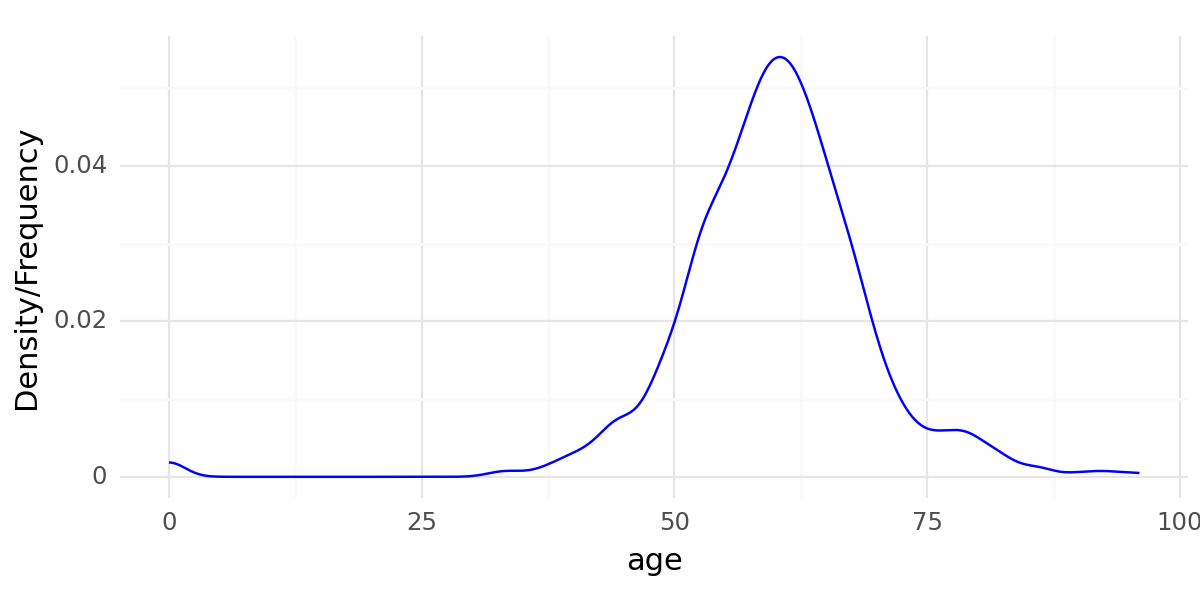

<Figure Size: (600 x 300)>

In [140]:
( ggplot(director_data_filtered) 
   + geom_density(aes(x='age', y='stat(density)'), color='blue') 
   + labs(y='Density/Frequency') 
   + theme_minimal()
   + theme(figure_size=(6, 3))
)

Salary shows strong outliers on both sides that we should tackle.  This is a good example of a variable that benefits from log adjustment. 

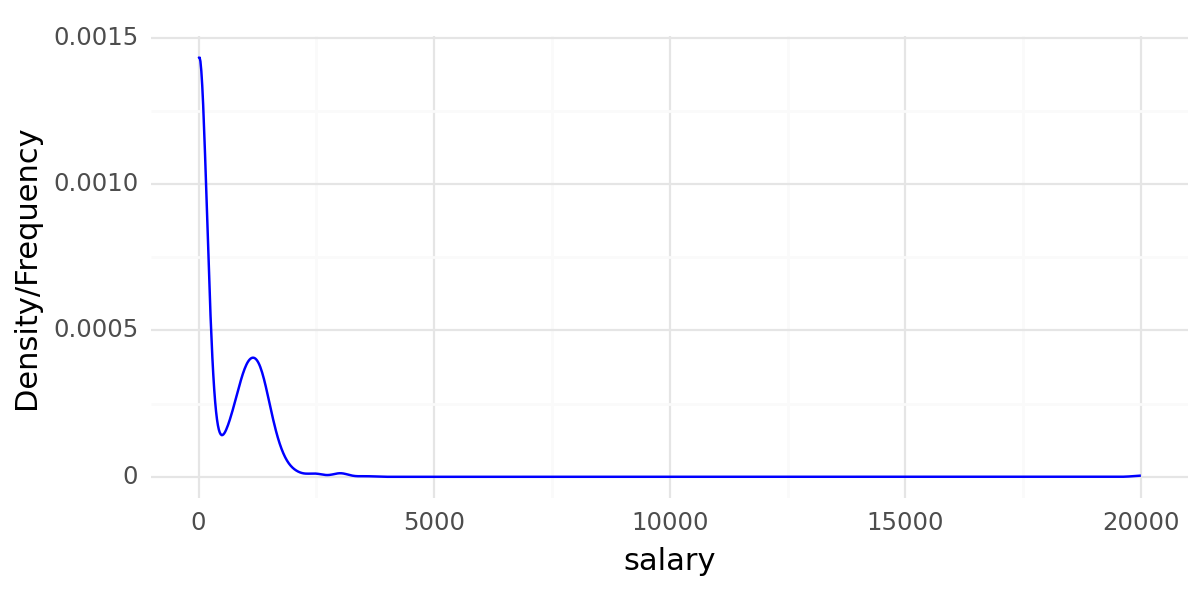

<Figure Size: (600 x 300)>

In [141]:
( ggplot(director_data_filtered) 
   + geom_density(aes(x='salary', y='stat(density)'), color='blue') 
   + labs(y='Density/Frequency') 
   + theme_minimal()
   + theme(figure_size=(6, 3))
)

We find the same for market capitalization and many of the other variables as well, and log adjustment would again be a good way to adjust this variable.   Log adjustment is a very common way to adjust variables in Finance, because many of them tend to be powerlaw distributed. 

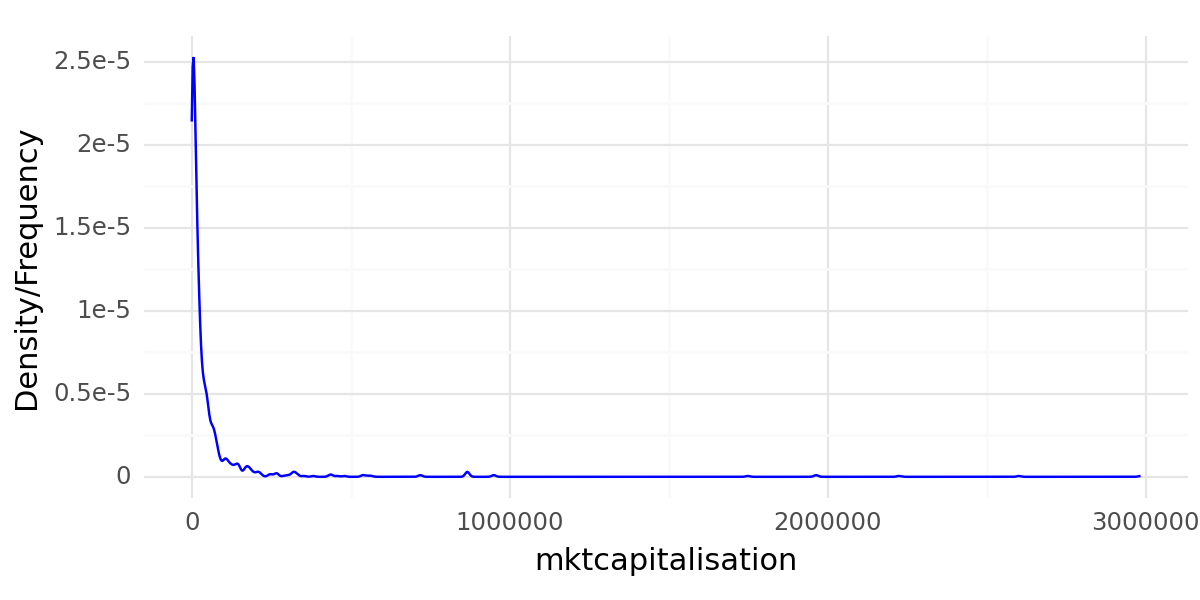

<Figure Size: (600 x 300)>

In [170]:
( ggplot(director_data_filtered) 
   + geom_density(aes(x='mktcapitalisation', y='stat(density)'), color='blue') 
   + labs(y='Density/Frequency') 
   + theme_minimal()
   + theme(figure_size=(6, 3))
)

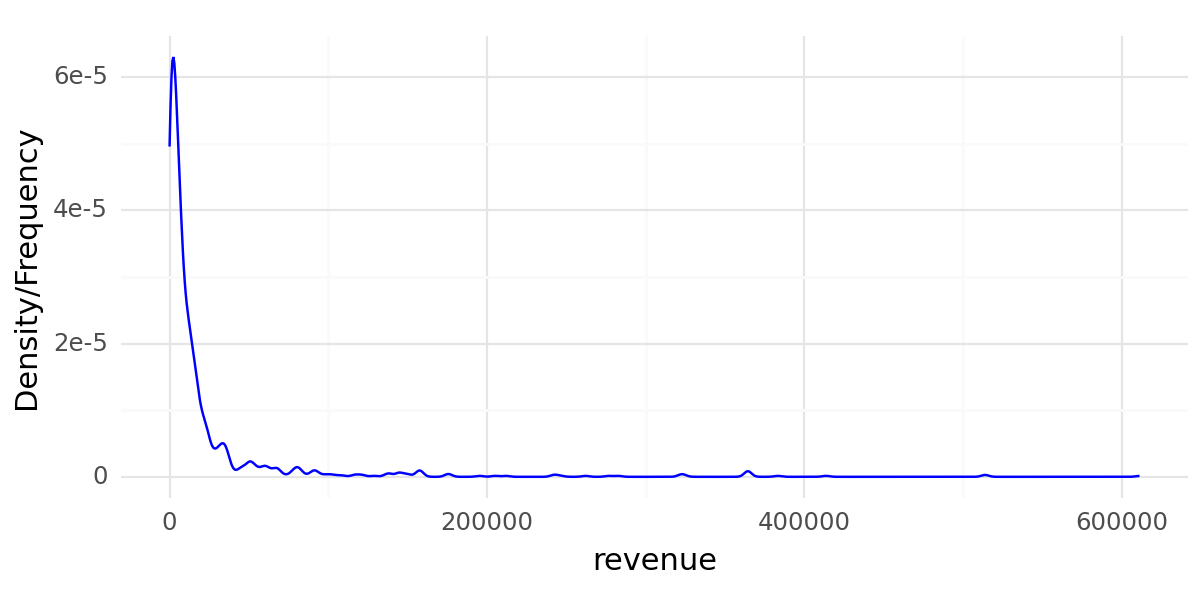

<Figure Size: (600 x 300)>

In [174]:
( ggplot(director_data_filtered) 
   + geom_density(aes(x='revenue', y='stat(density)'), color='blue') 
   + labs(y='Density/Frequency') 
   + theme_minimal()
   + theme(figure_size=(6, 3))
)

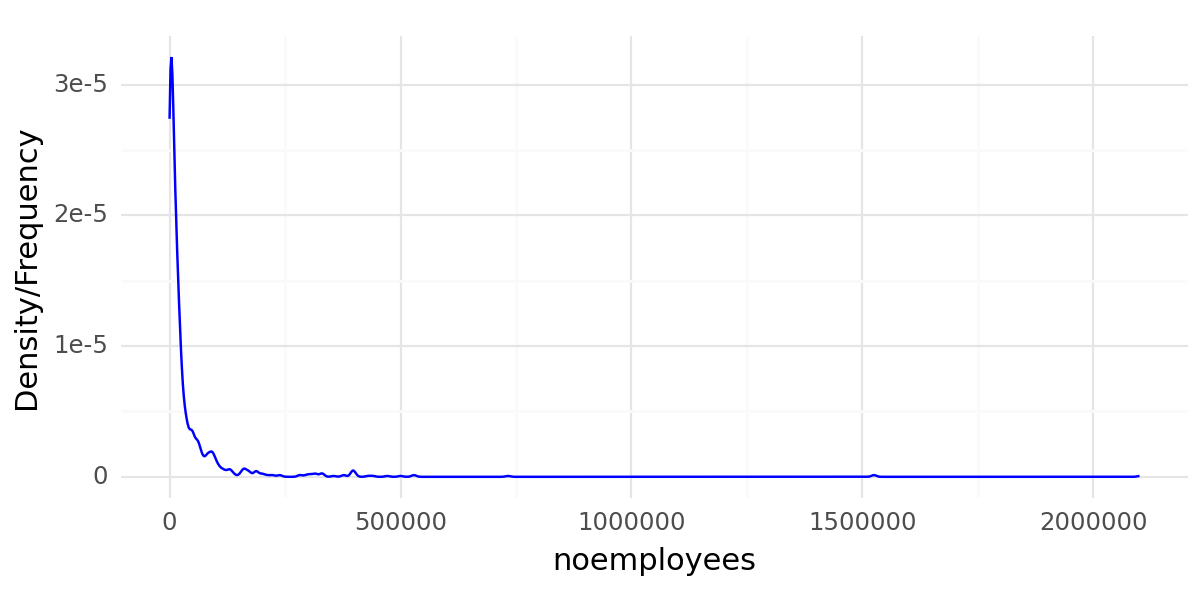

<Figure Size: (600 x 300)>

In [175]:
( ggplot(director_data_filtered) 
   + geom_density(aes(x='noemployees', y='stat(density)'), color='blue') 
   + labs(y='Density/Frequency') 
   + theme_minimal()
   + theme(figure_size=(6, 3))
)

## Data Analysis and Adjustments

By inspecting the age variable, we see that thre are nine directors with an age of zero. 

In [149]:
director_data_filtered.age [director_data_filtered.age < 30] 

1961     0.0
4951     0.0
5427     0.0
6735     0.0
8616     0.0
8951     0.0
10570    0.0
16436    0.0
17076    0.0
Name: age, dtype: float64

And there is one director with an extraordinary amount of the value of the options held. 

In [155]:
director_data_filtered.estvaloptheld[director_data_filtered.estvaloptheld > 1e6] 

12730    36973539.0
Name: estvaloptheld, dtype: float64

Several directors have a salary of zero Dollars.

In [166]:
director_data_filtered.salary[director_data_filtered.salary < 10] 

1        0.0
87       0.0
115      0.0
144      0.0
149      0.0
        ... 
18786    0.0
18806    0.0
18884    0.0
18940    0.0
18946    0.0
Name: salary, Length: 603, dtype: float64

And two have a salary of $20 Million Dollars.

In [164]:
director_data_filtered.salary[director_data_filtered.salary > 1e4] 

2809     20000.0
17482    20000.0
Name: salary, dtype: float64

We find several firms with a market cap of zero and some with an extraordinarily high market cap. 

In [169]:
director_data_filtered.mktcapitalisation[director_data_filtered.mktcapitalisation < 1] 

149      0.0
174      0.0
270      0.0
1436     0.0
2089     0.0
2862     0.0
4670     0.0
4782     0.0
5361     0.0
5427     0.0
5616     0.0
7682     0.0
8616     0.0
8951     0.0
9643     0.0
10205    0.0
12171    0.0
13137    0.0
13140    0.0
13608    0.0
14425    0.0
14431    0.0
16151    0.0
17076    0.0
Name: mktcapitalisation, dtype: float64

In [173]:
director_data_filtered.mktcapitalisation[director_data_filtered.mktcapitalisation > 1e6] 

4304     2223752.0
6927     1963579.0
13360    1963579.0
14046    1748810.0
15925    2601585.0
17935    2983826.0
Name: mktcapitalisation, dtype: float64

There are also firms with no employees in the data set. 

In [176]:
director_data_filtered.noemployees[director_data_filtered.noemployees <1] 

149      0.0
174      0.0
270      0.0
1389     0.0
2089     0.0
3146     0.0
4060     0.0
4670     0.0
4782     0.0
5203     0.0
5214     0.0
6934     0.0
7676     0.0
9643     0.0
11378    0.0
12171    0.0
12818    0.0
13140    0.0
13492    0.0
13592    0.0
13608    0.0
14058    0.0
14425    0.0
14546    0.0
14604    0.0
14940    0.0
15481    0.0
15892    0.0
16151    0.0
16426    0.0
16686    0.0
18776    0.0
Name: noemployees, dtype: float64

And firms with no revenues.

In [177]:
director_data_filtered.revenue[director_data_filtered.revenue <1] 

115      0.0
149      0.0
174      0.0
270      0.0
706      0.0
1841     0.0
2034     0.0
2039     0.0
2089     0.0
2175     0.0
2423     0.0
4268     0.0
4508     0.0
4652     0.0
4670     0.0
4782     0.0
7676     0.0
7932     0.0
8586     0.0
9643     0.0
10637    0.0
10672    0.0
11016    0.0
11378    0.0
11564    0.0
13140    0.0
13608    0.0
14425    0.0
14546    0.0
14940    0.0
15066    0.0
15187    0.0
15290    0.0
15672    0.0
16151    0.0
16426    0.0
18514    0.0
18776    0.0
Name: revenue, dtype: float64

With this operation, we remove the outliers we found from the data set.  In an ARP or Dissertation, you would need to further review if you could substitue the outlier values with other values first, this can help keep some of the information in tact.   Removing the full observation is the most extreme approach. 

In [180]:
# remove outliers from the data set
director_data_selected = director_data_filtered[
                            (director_data_filtered.noemployees > 0) 
                         &  (director_data_filtered.mktcapitalisation > 0)
                         &  (director_data_filtered.mktcapitalisation > 0)
                         &  (director_data_filtered.salary < 1e4)
                         &  (director_data_filtered.salary > 10)
                         &  (director_data_filtered.age > 30)
                        ]

In [181]:
( director_data_selected
     .get(["mktcapitalisation","noemployees","revenue","salary","bonus","other",
           "totaldirectcomp","estvaloptheld","ltipvalue","toteqatrisk","age"])
).describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
mktcapitalisation,596.0,80165.847,241205.650,124.0,12918.75,26369.0,65076.75,2983826.0
noemployees,596.0,55924.471,143942.596,28.0,9366.00,19600.0,51000.00,2100000.0
revenue,596.0,29719.166,62015.209,92.0,5473.00,11654.5,23971.00,611289.0
salary,596.0,961.656,576.587,14.0,593.00,1000.0,1315.00,3549.0
bonus,596.0,271.681,1614.505,0.0,0.00,0.0,0.00,28000.0
other,596.0,216.683,680.442,0.0,8.00,50.0,214.25,12039.0
totaldirectcomp,596.0,1462.871,1950.650,14.0,704.50,1183.5,1591.00,29403.0
estvaloptheld,596.0,29027.760,67434.908,0.0,0.00,565.5,26817.50,579789.0
ltipvalue,596.0,13556.013,36493.481,0.0,2264.75,8185.0,15140.00,561895.0
toteqatrisk,596.0,16024.807,37391.273,0.0,3194.00,9644.0,18333.25,561895.0


## Bivariate Plots

Boxplots help to put continuous variables in the context of categorical variables. 

In [191]:
from plotnine import ggplot, aes, geom_boxplot, geom_smooth, geom_point, labs, theme_classic

Here we review the distribution of salary by gender. 

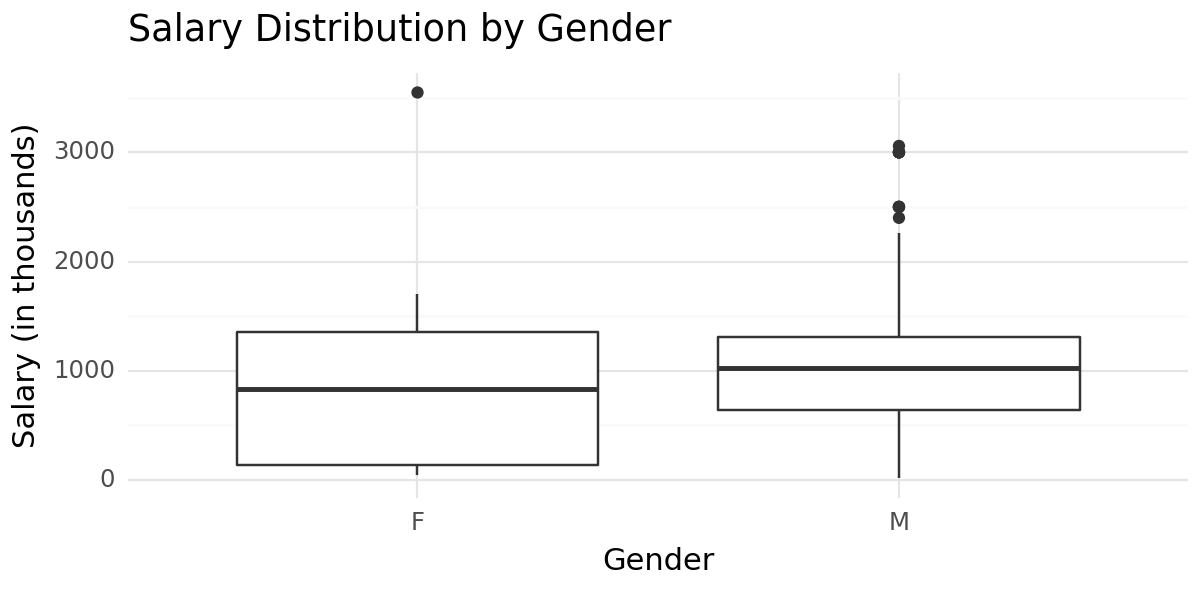

<Figure Size: (600 x 300)>

In [188]:
(ggplot(director_data_selected, aes(x='gender', y='salary'))
        + geom_boxplot()
        + labs(title='Salary Distribution by Gender', x='Gender', y='Salary (in thousands)')
        + theme_minimal()
        + theme(figure_size=(6, 3)))

And scatterplots are the most common way to understand continuous/continuous bivariate relationships.   Plotnine has the capability to easily add regression lines to scatterplots with the geom_smooth function. 

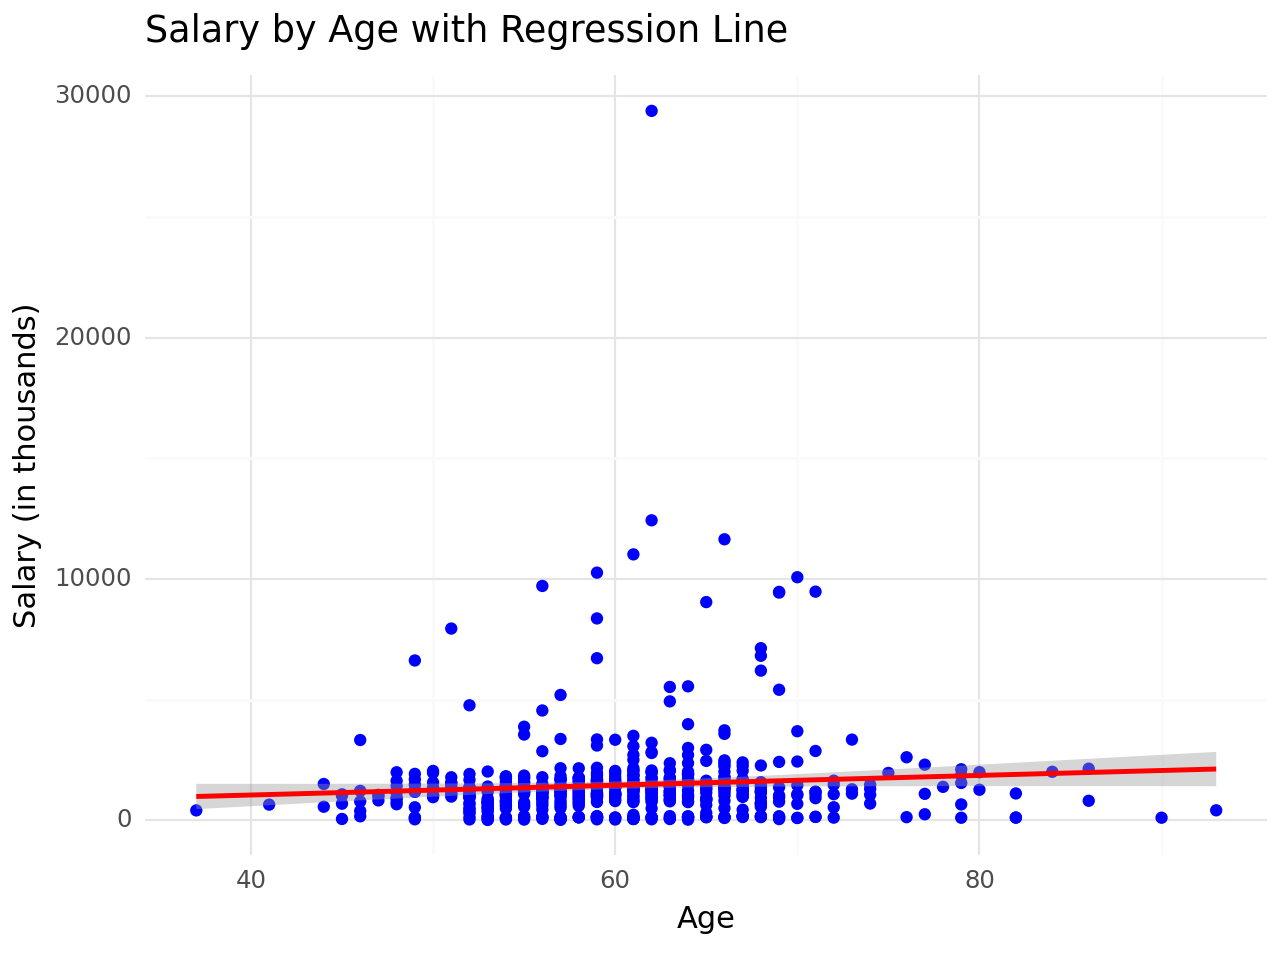

<Figure Size: (640 x 480)>

In [194]:
 (ggplot(director_data_selected, aes(x='age', y='totaldirectcomp'))
        + geom_point(color='blue')  # Scatter plot
        + geom_smooth(method='lm', color='red', se=True)  # Regression line, se=False removes the confidence interval
        + labs(title='Salary by Age with Regression Line', x='Age', y='Salary (in thousands)')
        + theme_minimal()
        )

## Correlations

To understand bivariate relationships quantitatively, we use Pearson correlations (for continuos/continuos).  Numpy is Python's library that handles matrix data structures and operations under the covers. 

In [197]:
import numpy as np

We need to select only the numeric columns to calculate the correlation. 

In [ ]:
# Get numeric columns for correlation
numeric_cols = director_data_selected.select_dtypes(include=[np.number]).columns

director_data_numeric = director_data_selected[numeric_cols]
director_data_numeric = director_data_numeric.drop(columns=['directorid','companyid']) # these two are numeric, but nonsensical in the analysis

In [220]:
correlation_matrix = director_data_numeric.corr()

In [221]:
correlation_matrix

,age,mktcapitalisation,noemployees,revenue,salary,bonus,other,totaldirectcomp,estvaloptheld,ltipvalue,toteqatrisk
age,1.000000,0.007896,0.027702,0.038704,0.019957,0.070327,0.037373,0.076668,0.056103,0.027936,0.015650
mktcapitalisation,0.007896,1.000000,0.442745,0.588525,0.149248,0.026862,0.236128,0.148649,0.024499,0.190710,0.187987
noemployees,0.027702,0.442745,1.000000,0.725554,0.051220,-0.005834,0.107506,0.047550,-0.018586,0.011452,0.014794
revenue,0.038704,0.588525,0.725554,1.000000,0.172666,0.046512,0.181786,0.153047,-0.007104,0.086272,0.091891
salary,0.019957,0.149248,0.051220,0.172666,1.000000,0.107232,0.208512,0.459850,0.219429,0.230475,0.265799
bonus,0.070327,0.026862,-0.005834,0.046512,0.107232,1.000000,0.013658,0.864433,-0.015245,0.030334,0.025224
other,0.037373,0.236128,0.107506,0.181786,0.208512,0.013658,1.000000,0.422277,0.123009,0.226855,0.224734
totaldirectcomp,0.076668,0.148649,0.047550,0.153047,0.459850,0.864433,0.422277,1.000000,0.095496,0.172612,0.178276
estvaloptheld,0.056103,0.024499,-0.018586,-0.007104,0.219429,-0.015245,0.123009,0.095496,1.000000,0.238833,0.323895
ltipvalue,0.027936,0.190710,0.011452,0.086272,0.230475,0.030334,0.226855,0.172612,0.238833,1.000000,0.978938


In [ ]:
from scipy.stats import pearsonr

We will also add p-values to understand which of the correlations are significant. The Python package SciPy contains many useful helper functions, such as pearsonr to carry out this analysis.

The p-value in the context of a correlation coefficient provides a measure of the probability that the observed correlation occurred by chance under the null hypothesis. The null hypothesis typically states that there is no relationship (no correlation) between the two variables being studied. In correlation significance testing, the p-value is calculated based on the correlation coefficient and the sample size. It measures the strength and direction of the linear relationship between two continuous variables.

- Low P-value (< 0.05 usually): A low p-value suggests that the evidence against the null hypothesis is strong. In correlation tests, it indicates that the likelihood of observing the given correlation coefficient between two variables, assuming that there is no actual correlation, is low. Thus, we reject the null hypothesis and conclude there is a statistically significant correlation between the variables.
- High P-value (≥ 0.05): A high p-value suggests that the evidence against the null hypothesis is weak. This implies that the correlation observed could likely have occurred by chance, and there isn't enough evidence to conclude a statistically significant correlation exists.


In [222]:
# we also want to have p-values for the correlations, which we calculate using the pearsonr function
p_value_matrix = pd.DataFrame(index=director_data_numeric.columns, columns=director_data_numeric.columns, dtype=float)

for i in director_data_numeric.columns:
    for j in director_data_numeric.columns:
        if i != j:
            corr_test = pearsonr(director_data_numeric[i], director_data_numeric[j])
            p_value_matrix.at[i, j] = corr_test[1]
        else:
            p_value_matrix.at[i, j] = np.nan

In [223]:
# Initialize combined results with object dtype
combined_results = pd.DataFrame(index=correlation_matrix.index, columns=correlation_matrix.columns, dtype='object')

# format the results for nicer output
for i in combined_results.columns:
    for j in combined_results.index:
        combined_results.at[i, j] = f"{correlation_matrix.at[i, j]:.2f} (p={p_value_matrix.at[i, j]:.3f})"

# Set diagonal in p-value matrix to NaN for clarity (self-correlation is not meaningful)
np.fill_diagonal(combined_results.values, np.nan)

In [224]:
combined_results

,age,mktcapitalisation,noemployees,revenue,salary,bonus,other,totaldirectcomp,estvaloptheld,ltipvalue,toteqatrisk
age,NaN,0.01 (p=0.847),0.03 (p=0.500),0.04 (p=0.346),0.02 (p=0.627),0.07 (p=0.086),0.04 (p=0.362),0.08 (p=0.061),0.06 (p=0.171),0.03 (p=0.496),0.02 (p=0.703)
mktcapitalisation,0.01 (p=0.847),NaN,0.44 (p=0.000),0.59 (p=0.000),0.15 (p=0.000),0.03 (p=0.513),0.24 (p=0.000),0.15 (p=0.000),0.02 (p=0.551),0.19 (p=0.000),0.19 (p=0.000)
noemployees,0.03 (p=0.500),0.44 (p=0.000),NaN,0.73 (p=0.000),0.05 (p=0.212),-0.01 (p=0.887),0.11 (p=0.009),0.05 (p=0.246),-0.02 (p=0.651),0.01 (p=0.780),0.01 (p=0.719)
revenue,0.04 (p=0.346),0.59 (p=0.000),0.73 (p=0.000),NaN,0.17 (p=0.000),0.05 (p=0.257),0.18 (p=0.000),0.15 (p=0.000),-0.01 (p=0.863),0.09 (p=0.035),0.09 (p=0.025)
salary,0.02 (p=0.627),0.15 (p=0.000),0.05 (p=0.212),0.17 (p=0.000),NaN,0.11 (p=0.009),0.21 (p=0.000),0.46 (p=0.000),0.22 (p=0.000),0.23 (p=0.000),0.27 (p=0.000)
bonus,0.07 (p=0.086),0.03 (p=0.513),-0.01 (p=0.887),0.05 (p=0.257),0.11 (p=0.009),NaN,0.01 (p=0.739),0.86 (p=0.000),-0.02 (p=0.710),0.03 (p=0.460),0.03 (p=0.539)
other,0.04 (p=0.362),0.24 (p=0.000),0.11 (p=0.009),0.18 (p=0.000),0.21 (p=0.000),0.01 (p=0.739),NaN,0.42 (p=0.000),0.12 (p=0.003),0.23 (p=0.000),0.22 (p=0.000)
totaldirectcomp,0.08 (p=0.061),0.15 (p=0.000),0.05 (p=0.246),0.15 (p=0.000),0.46 (p=0.000),0.86 (p=0.000),0.42 (p=0.000),NaN,0.10 (p=0.020),0.17 (p=0.000),0.18 (p=0.000)
estvaloptheld,0.06 (p=0.171),0.02 (p=0.551),-0.02 (p=0.651),-0.01 (p=0.863),0.22 (p=0.000),-0.02 (p=0.710),0.12 (p=0.003),0.10 (p=0.020),NaN,0.24 (p=0.000),0.32 (p=0.000)
ltipvalue,0.03 (p=0.496),0.19 (p=0.000),0.01 (p=0.780),0.09 (p=0.035),0.23 (p=0.000),0.03 (p=0.460),0.23 (p=0.000),0.17 (p=0.000),0.24 (p=0.000),NaN,0.98 (p=0.000)


## Results and Write-up

The correlation table provides several key insights into the relationships between firm characteristics, executive attributes, and various forms of director compensation.

Market Capitalization and Director Compensation:   The correlation between market capitalization and total direct compensation is 0.15 (p < 0.0001). This positive and statistically significant correlation supports our first hypothesis, suggesting that larger firms do indeed tend to offer higher compensation to their directors. Additionally, market capitalization shows significant correlations with several other compensation components, such as salary (0.15, p < 0.0001) and other compensation (0.24, p < 0.0001), reinforcing the idea that firm size is an important determinant of executive pay.

Revenue and Director Compensation: Revenue has a correlation of 0.15 (p < 0.0001) with total direct compensation, which supports our second hypothesis. This indicates that firms with higher revenue generally provide higher compensation to their directors. Revenue also shows significant correlations with salary (0.17, p < 0.0001) and other compensation (0.18, p < 0.0001), suggesting that higher revenue firms may allocate more resources towards executive pay packages.

Number of Employees and Director Compensation: The correlation between the number of employees and total direct compensation is 0.05 (p = 0.246), which is not statistically significant. This does not support our third hypothesis. However, there is a positive and significant correlation between the number of employees and other forms of compensation, such as salary (0.05, p = 0.212), though it is relatively weak. This suggests that the number of employees may not be as strong a predictor of total compensation as other factors like market capitalization and revenue.

In summary, the correlation analysis provides valuable insights into the relationships between firm characteristics and director compensation. Our hypotheses regarding the impact of market capitalization and revenue on director compensation are supported by the data, while the relationship between the number of employees and total compensation is less clear. This exercise highlights the importance of empirical analysis in understanding the dynamics of executive pay and underscores the need for careful consideration of multiple factors when assessing compensation structures.

## Data Saving and Loading

We save data at this point, so we don't have the re-run the preparation again each time.   This is also good practice for reproducibilty of the research, so you can demonstrably get to the same results, even if the data in WRDS changes. 

In [230]:
# Save data frames
datastore_ = pd.HDFStore('week1.h5')
datastore_['director_data_selected'] = director_data_selected
datastore_['director_data_numeric'] = director_data_numeric
datastore_.close()

In [4]:
# Load data frames
datastore_ = pd.HDFStore('week1.h5')
director_data_selected = datastore_['director_data_selected'] 
director_data_numeric = datastore_['director_data_numeric'] 
datastore_.close()  

# Assignment

Now comes your first research project in Python. 

WRDS contains another data source called Execucomp that contains similar data as BoardEx (the latter is more granular that the former).  Execucomp is part of the CapitalIQ offering, and collects information from the annually filed DEF14A SEC form. 

Use similar steps as described in this notebook to access and explore Execucomp and download data on executive gender, age and tenure with the firm as well as salary, bonus, stock and options based compensation for your choice of firms (it is ok if you use a small set of firms instead of a full index).  Also identify data that indicate the size of the 'golden parachute' (payments due in case of changes in control). 

What does the distribution of executive compensation look like for your choice of firms?  Provide descriptive statistics of all numeric variables including age, salary, bonus, and share of stock/options based compensation.  Can you identify correlations between gender, age, tenure and compensation?  Are those correlations significant?   How about the golden parachute?

Conduct this in three steps:

1. Download, review and clean the relevant data. Explain the reasons for your data adjustments and selections. 
2. Calculate and review descriptive statistics and bivariate correlations.
3. Create plots to identify group differences for categorical variables.

Create a report with a minimum of one graph and one table, and explain your results. 